## Christian's Final Project


1. Where your data came from
2. What questions you were looking to answer and predictions you wanted to make
3. A brief summary of your methodology for answering these questions
4. Graphs and other visualizations that clearly explain your findings (ideally, conclusions)
5. Metrics you tracked, the values for each, and how you interpret the results (e.g. recall, accuracy, f1, etc.)


## Data

My data came from Kaggle (https://www.kaggle.com/datasnaek/youtube-new/data#) and refers to the trending data on Youtube in the United States.

## Hypothesis

I was looking to answer what type of videos were most commonly at the top of youtube's trending page. The predictions I wanted to make were that the channels that placed in trending the most were of three catagories (Famous outside of Youtube, Famous inside of Youtube, connected to someone in the first two groups), and that trending videos would be have an average view count above 1 million but under 10 million unique views, Most importantly, I wanted to test features correlate most to being on trending.

## Methodology

My methodology for this project was to first clean the data, then identify which columns would serve me best in testing my hypothesis, and finally, examining the data and training a model to see how many views/what view count would need to be reached to trend the for each additional day.

In [90]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.spatial import distance
from sklearn.cluster import KMeans


df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [31]:
df = df.drop(columns = ['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'])
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [32]:
df['channel_title']

0                    CaseyNeistat
1                 LastWeekTonight
2                    Rudy Mancuso
3           Good Mythical Morning
4                        nigahiga
                   ...           
40944               AaronsAnimals
40945                    zefrank1
40946                  Brad Mondo
40947    How It Should Have Ended
40948                Call of Duty
Name: channel_title, Length: 40949, dtype: object

In [33]:
def times_trending(df):
    return 1

df['trending'] = df['channel_title'].apply(times_trending)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,1
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,1
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,1
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,1
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,1


In [34]:
dup_title = df.drop_duplicates(subset='title')
dup_title

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,1
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,18.14.06,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,26,2018-06-12T18:55:26.000Z,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,1
40761,JGm9Y_hFqNk,18.14.06,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13T15:06:08.000Z,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,1
40762,6h8QgZF5Qu4,18.14.06,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,24,2018-06-13T05:27:27.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,1
40764,mpnshdmtE2Y,18.14.06,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,26,2018-06-12T16:03:58.000Z,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",540149,14206,693,1211,1


In [35]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,1
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,1
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,1
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,1
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,1
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,1


## Important Note

out of 40949 instances of trending videos, 6455 are unqiue

## Trending Data Summation for all instances (including duplicate videos)

In [36]:
repChan = df.groupby(['channel_title'], as_index=False).sum()
repChan

,channel_title,category_id,views,likes,dislikes,comment_count,trending
0,12 News,44,177970,352,90,0,2
1,1MILLION Dance Studio,792,20959169,1399898,15030,110408,33
2,1theK (원더케이),190,57375949,3663362,63329,255669,19
3,20th Century Fox,135,1082872611,24419452,488761,1509224,135
4,2CELLOS,20,432186,22900,245,917,2
...,...,...,...,...,...,...,...
2202,ワーナー ブラザース 公式チャンネル,6,7389323,154962,6128,21560,6
2203,圧倒的不審者の極み!,336,11417717,157447,12315,54177,12
2204,杰威爾音樂 JVR Music,290,400530463,3400678,229439,382766,29
2205,郭韋辰,56,26964,99,2,8,2


In [48]:
repChan.sort_values(by=['trending'], ascending=False)

,channel_title,category_id,views,likes,dislikes,comment_count,trending
555,ESPN,3451,105654218,937723,108043,387753,203
1785,The Tonight Show Starring Jimmy Fallon,4531,271426383,5981334,187407,403655,197
1943,Vox,4825,122633963,3272518,615977,558845,193
1271,Netflix,4632,185818315,4211072,196212,391350,193
1804,TheEllenShow,4632,253841999,6035132,193602,344469,193
...,...,...,...,...,...,...,...
1698,Taylor Alexander,28,5584,38,2,10,1
788,Humble Design,29,23634,131,13,23,1
1690,Tamar Chronicles,24,451356,3454,284,623,1
154,BTS Videos,24,153341,477,200,92,1


In [49]:
repChan.sort_values(by=['views'], ascending=False)

,channel_title,category_id,views,likes,dislikes,comment_count,trending
358,ChildishGambinoVEVO,250,3758488765,96700818,6054434,10151289,25
2094,ibighit,800,2235906679,199247121,3467306,31817464,80
541,Dude Perfect,2227,1870085178,60275557,1501477,4009163,131
1129,Marvel Entertainment,2824,1808998971,55873344,1031250,6453560,125
110,ArianaGrandeVevo,430,1576959172,52170970,1931230,4295333,43
...,...,...,...,...,...,...,...
293,CHauserable,23,1807,6,3,0,1
1863,Total Combat,17,1722,17,3,1,1
1319,OjO Commuter Scooter by OjO Electric,38,1706,6,1,0,2
698,GoDucksdotcom,34,1391,20,4,10,2


## Trending Data Summation for First Video Appearance

In [40]:
repChanTitle = dup_title.groupby(['channel_title'], as_index=False).sum()
repChanTitle

,channel_title,category_id,views,likes,dislikes,comment_count,trending
0,12 News,22,85643,170,45,0,1
1,1MILLION Dance Studio,96,1733477,122066,1276,8527,4
2,1theK (원더케이),50,7035666,702920,8435,49777,5
3,20th Century Fox,17,48572239,1204019,21395,78337,17
4,2CELLOS,10,205869,11198,120,446,1
...,...,...,...,...,...,...,...
2193,ワーナー ブラザース 公式チャンネル,1,755014,15686,558,1768,1
2194,圧倒的不審者の極み!,28,294419,7310,378,2780,1
2195,杰威爾音樂 JVR Music,20,22873768,180699,11758,20164,2
2196,郭韋辰,28,12594,48,1,4,1


In [43]:
repChanTitle.sort_values(by=['trending'], ascending=False)

,channel_title,category_id,views,likes,dislikes,comment_count,trending
551,ESPN,1428,41744126,372908,62162,159221,84
1796,TheEllenShow,1776,71542914,1821187,41753,106142,74
1778,The Tonight Show Starring Jimmy Fallon,1656,53807761,1527726,33199,93361,72
884,Jimmy Kimmel Live,1658,63270493,1215868,68477,118705,70
1265,Netflix,1392,24458611,685639,28778,66783,58
...,...,...,...,...,...,...,...
910,Just Jared Jr,24,37812,276,547,198,1
905,JuJu Smith-Schuster,24,283692,10749,198,1809,1
904,Joshua Levin,28,5391,57,0,3,1
903,Josh Levine,24,1719,8,0,0,1


In [44]:
repChanTitle.sort_values(by=['views'], ascending=False)

,channel_title,category_id,views,likes,dislikes,comment_count,trending
537,Dude Perfect,204,108024253,4447335,86018,319353,12
2086,ibighit,90,103235984,16434967,153241,2420258,9
2104,jypentertainment,70,87356902,3657159,195893,587408,7
1123,Marvel Entertainment,362,80171420,3731846,41194,455700,16
1796,TheEllenShow,1776,71542914,1821187,41753,106142,74
...,...,...,...,...,...,...,...
1900,University of Rochester EEOC Complainants,22,884,11,5,2,1
1313,OjO Commuter Scooter by OjO Electric,19,789,3,0,0,1
18,90s Commercials,27,773,2,0,0,1
693,GoDucksdotcom,17,687,10,2,5,1


## Average Viewer Count for each Video when first hit trending

In [51]:
dup_title['views'].sum()/len(dup_title['views'])

772512.7439194423

### Average viewers of all videos over 1 million views

In [53]:
indexviews = repChanTitle[ (repChanTitle['views'] < 1000000)].index
repChanTitle.drop(indexviews , inplace=True)

In [54]:
repChanTitle

,channel_title,category_id,views,likes,dislikes,comment_count,trending
1,1MILLION Dance Studio,96,1733477,122066,1276,8527,4
2,1theK (원더케이),50,7035666,702920,8435,49777,5
3,20th Century Fox,17,48572239,1204019,21395,78337,17
10,5-Minute Crafts,78,11723195,114979,17247,12377,3
14,5SOSVEVO,30,1813858,359749,2092,44012,3
...,...,...,...,...,...,...,...
2182,vlogbrothers,242,1751991,129582,1601,16286,11
2186,weezer,10,1191202,37446,1281,3226,1
2189,zefrank1,66,2178525,185964,1336,20571,3
2190,Алексей Навальный,29,5579079,365439,63579,77462,1


In [55]:
repChanTitle['views'].sum()/len(repChanTitle['views'])

7458331.6284329565

## Correlation of Values for all unique first instances of a Trending Video

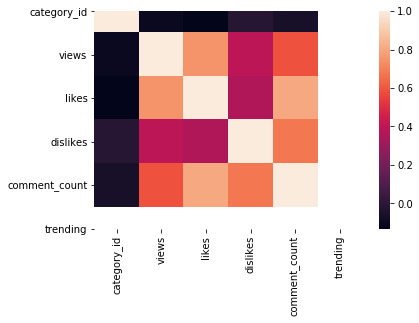

In [60]:
corr = dup_title.corr()
sns.heatmap(corr)

## Correlation of all Values for all instances of a Trending Video

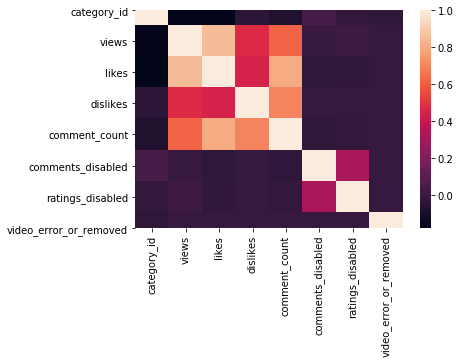

In [59]:
corr = df.corr()
sns.heatmap(corr)

In [76]:
feature_cols = ['views']

X = dup_title[feature_cols]
y = dup_title['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [77]:
print(len(y_train))
print(0.75*len(dup_title))

print(len(y_test))
print(0.25*len(dup_title))

4841
4841.25
1614
1613.75


In [81]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)

print(lr_reg.coef_)

print(lr_reg.intercept_)


[0.03992893]
3325.778224521662


In [85]:
print(lr_reg.predict(X_test))

print(lr_reg.score(X_test, y_test))
print(r2_score(y_test, lr_reg.predict(X_test)))

[ 46829.10103576   5841.58002363 174773.715874   ...  18922.89490002
  20718.37888594  32073.08717262]
0.6319314562196559
0.6319314562196559


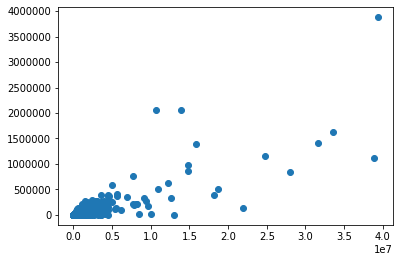

In [86]:
plt.scatter(X_test, y_test)

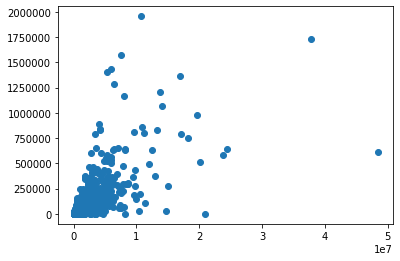

In [87]:
plt.scatter(X_train, y_train)

# Conclusions and Metrics

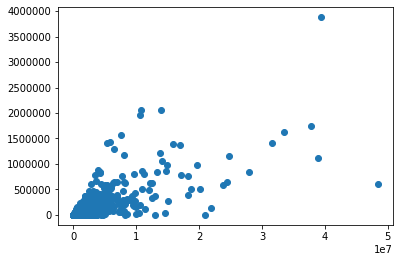

In [94]:
plt.scatter(dup_title['views'], dup_title['likes'])

Outside simple mathematical calculations to examine predictions, Correlations and R2 score were the main metrics used to check the value of the manipulated data.

Overall conclusions are as such:

1. A significant portion of the top of trending (both in number of views, and number of videos on trending), are from well known sources.
2. Music is usually the highest viewed content but, outside general music channels, specific artists do not land the on trending more than a half dozen times at most
3. there are notable outliers, however nothing that changes the overall dynamic of the data (a few low viewed content, most likely due to metrics of the trending model that are thrown off by rapid viewer count increases or like ratio)
4. average viewcount over all trending videos is about 772,500 viewers, meaning the average view count to reach trending is under 1 million views (however this is the value needed to reach in less than a day, to touch trending, not reflective of view count after reaching trending, nor indicitive of most cases)
5. of the ~2000 unique videos over the 200 day period, 600 were over 1 million views on their first day.
6. the r2 score of the view and like prediction model was .63, Although not entirely accurate, it does correspond well to the correlation of the the view to like ratio
7. there is a strong negative correlation between, not allowing comments (turning comments off) and being on trending. More data would be needed to see how well non-comment videos do.
8. No correlation between any one type of subject on the website and trending either. As a general concept, category of video has nothing to do with how well it does. The same goes for ratings, and a similar situation exisdts for dislikes (.4 correlation between trending/views and dislikes)
9. The Linear Regression model favored views over likes, when the actual data favors tends right vs up.

Given these conclusions and the Hypothesis made, it would seem that the idea that well known brands do best was correct, however the thought that more than a million views would be important was not entirely the case, but that likes and timing into how quickly from posting views were gotten, were also big parts in the success of reaching trending. Lastly, the overall correlation and linear regression model to test how well this data can predict future information seems decently accurate, though could probably benefit from a different approach to get a more accurate model.

Outside what could have been done, The only other interesting thing that I could think of that would help shed more light onto the trending page, would be one-hot encoding the titles of all videos and determining the best words to use in a title, and to see if captial letters or symbols played any part in view count as well as likes and dislikes.